In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Sequential, layers, losses, optimizers

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output


In [14]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28*28)/255
X_test = X_test.reshape(-1, 28*28)/255

In [15]:
print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)

(60000, 784) float64
(10000, 784) float64


In [16]:
print(y_train.shape, y_train[:10])
print(y_test.shape, y_test[:10])

(60000,) [5 0 4 1 9 2 1 3 1 4]
(10000,) [7 2 1 0 4 1 4 9 5 9]


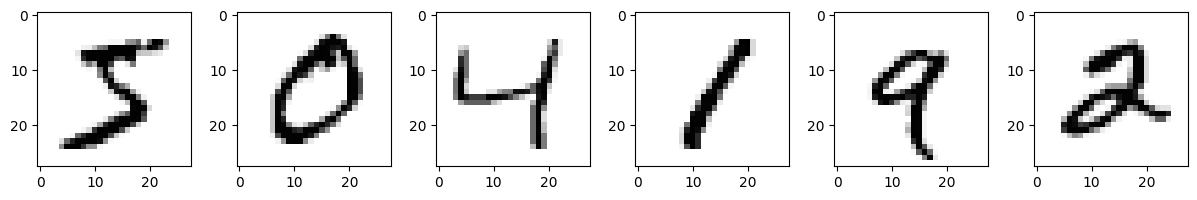

In [17]:
fig, axes = plt.subplots(1, 6, figsize=(15, 2))
for img, ax in zip(X_train, axes.flat):
    ax.imshow(img.reshape(28, 28), cmap='Greys')
plt.show()

In [18]:
# можно настроить GPU
# tf.config.list_physical_devices('GPU')

In [19]:
model = Sequential([
    layers.InputLayer((28*28,)),
    layers.Dense(500, 'relu'),
    layers.Dense(500, 'relu'),
    layers.Dense(10)
])

In [20]:
model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = optimizers.Adam(),
    metrics = ['accuracy']
)

In [21]:
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=1024
)

Epoch 1/10
59/59 [==============================] - 7s 87ms/step - loss: 0.4706 - accuracy: 0.8690 - val_loss: 0.1937 - val_accuracy: 0.9426
Epoch 2/10
59/59 [==============================] - 5s 84ms/step - loss: 0.1595 - accuracy: 0.9539 - val_loss: 0.1310 - val_accuracy: 0.9616
Epoch 3/10
59/59 [==============================] - 5s 93ms/step - loss: 0.1059 - accuracy: 0.9693 - val_loss: 0.0997 - val_accuracy: 0.9710
Epoch 4/10
59/59 [==============================] - 5s 81ms/step - loss: 0.0775 - accuracy: 0.9776 - val_loss: 0.0840 - val_accuracy: 0.9747
Epoch 5/10
59/59 [==============================] - 5s 84ms/step - loss: 0.0580 - accuracy: 0.9830 - val_loss: 0.0778 - val_accuracy: 0.9762
Epoch 6/10
59/59 [==============================] - 4s 69ms/step - loss: 0.0431 - accuracy: 0.9880 - val_loss: 0.0811 - val_accuracy: 0.9750
Epoch 7/10
59/59 [==============================] - 4s 69ms/step - loss: 0.0356 - accuracy: 0.9900 - val_loss: 0.0646 - val_accuracy: 0.9807
Epoch 8/10
59

Callback

In [22]:
from tensorflow.keras.callbacks import *

ModelCheckpoint('models/best_model.keras', monitor='val_accuracy', 
                verbose=1, mode='max', save_best_only=True)

In [23]:
# обучние прекращается, если val_loss не падает в течение 5 эпох
EarlyStopping(monitor='val_loss', patience=5)

1. TerminateOnNan() <br>
Обучение прекращается, если loss = NaN. Причины:
* слишком высокий Learning rate
* отсутствие нормализации входных данных
* NaN во входных данных
* ошибка в архитектуре сети

2. LambdaCallback(on_epoch_end=lambda epoch, logs:<br>
            print(f'Epoch {epoch} ended... Should we do something?'))<br>
            <br>

   Эта функция позволяет выполнить любые действия после конца эпохи или шага обучения (батча), а также и в другие моменты. <br>
   <br>
   Если требуется выполнить какие-то действия после каждой эпохи (например, визуализация процесса обучения на графиках, получение предсказаний или изменение обучающих данных), то можно сделать цикл, который будет вызывать метод .fit() с параметром epoch=1, а затем будут выполняться остальные необходимые действия. 

3. ReduceLROnPlateau() <br>
Эта функция уменьшает lr в те моменты, когда  начинает наблюдаться стагнация процесса обучения, то есть выбранная метрика (по умолчанию val_loss) не улучшается в процессе нескольких эпох.

## Визуализация

In [25]:
%precision %.3f
display(model.history.history)

{'loss': [0.471,
  0.160,
  0.106,
  0.078,
  0.058,
  0.043,
  0.036,
  0.027,
  0.021,
  0.016],
 'accuracy': [0.869,
  0.954,
  0.969,
  0.978,
  0.983,
  0.988,
  0.990,
  0.993,
  0.994,
  0.996],
 'val_loss': [0.194,
  0.131,
  0.100,
  0.084,
  0.078,
  0.081,
  0.065,
  0.067,
  0.064,
  0.061],
 'val_accuracy': [0.943,
  0.962,
  0.971,
  0.975,
  0.976,
  0.975,
  0.981,
  0.980,
  0.981,
  0.983]}

In [ ]:
# model.history = keras.callbacks.History()
# for epoch in range(10):
#     model.fit(..., callbacks=[model.history])

In [28]:
def visualize(history):
    clear_output(wait=True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    epochs = len(history.history['loss'])
    # draw loss in the first picture
    ax1.plot(np.arange(epochs) + 0.5, history.history['loss'], label='loss')
    ax1.plot(np.arange(epochs) + 1, history.history['val_loss'], label='val_loss')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend()
    ax1.grid()
    # draw accurecy in the second picture
    ax2.plot(np.arange(epochs) + 0.5, history.history['accuracy'], label='accuracy')
    ax2.plot(np.arange(epochs) + 1, history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.legend()
    ax2.grid()


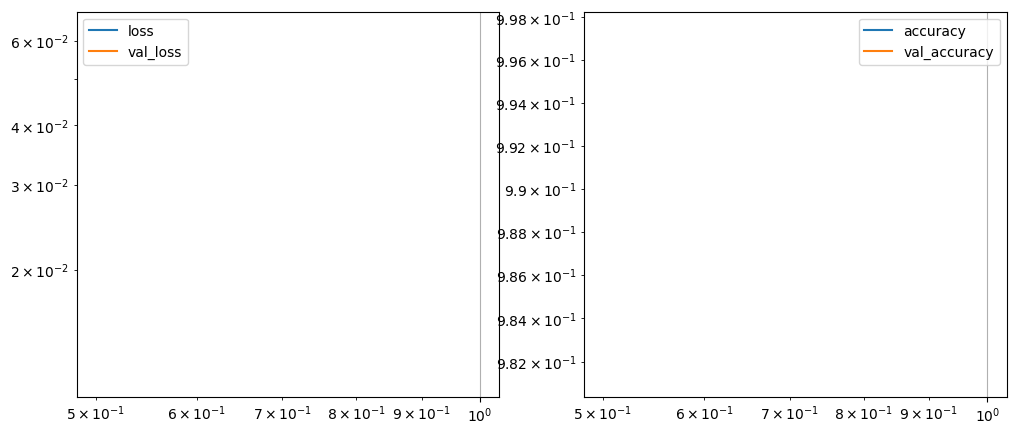

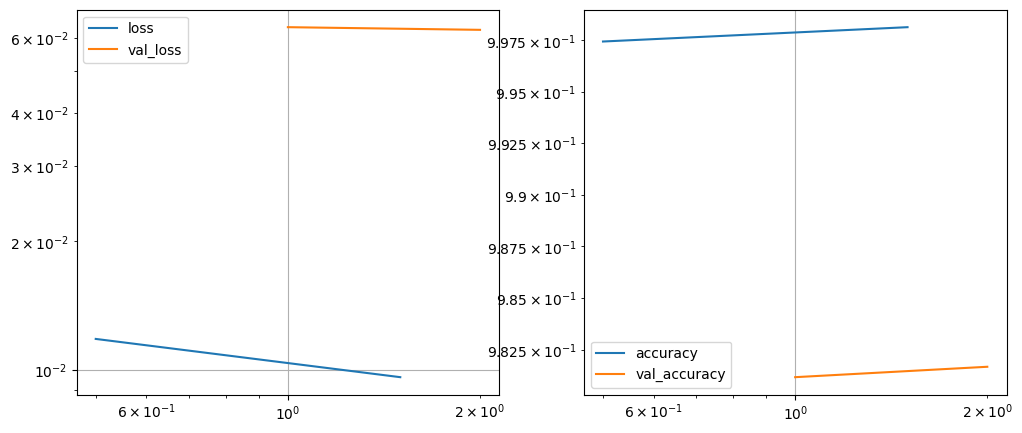

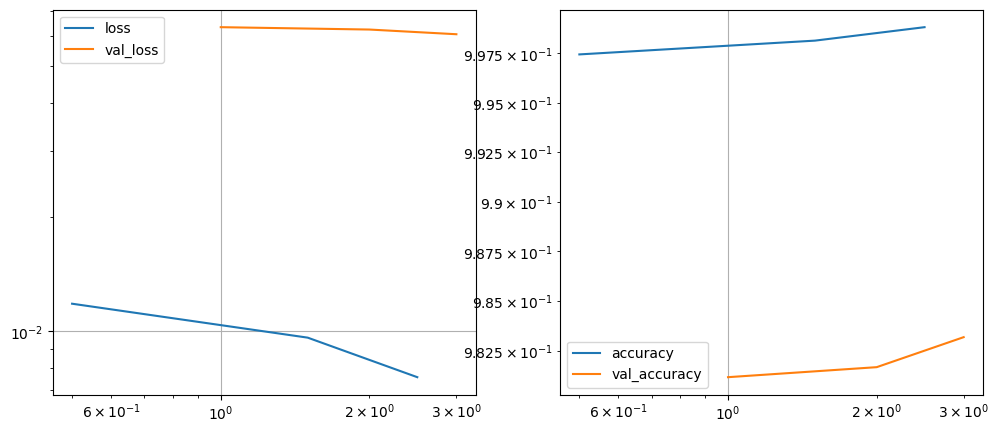

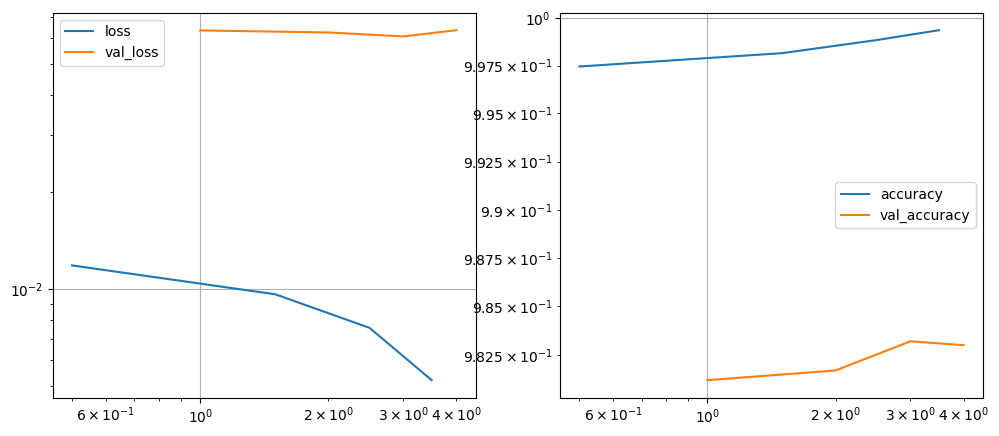

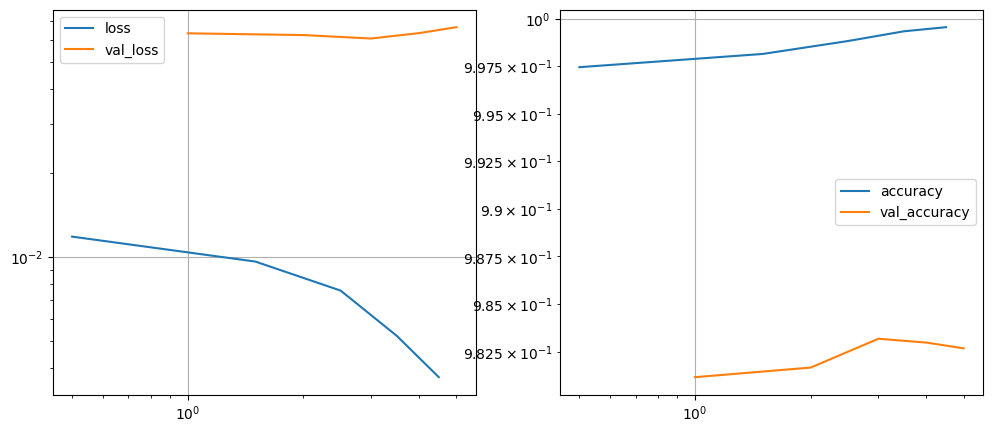

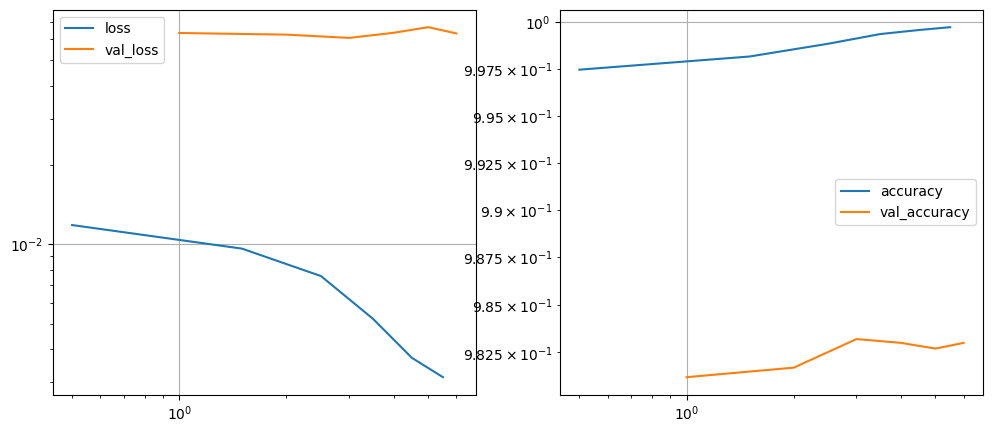

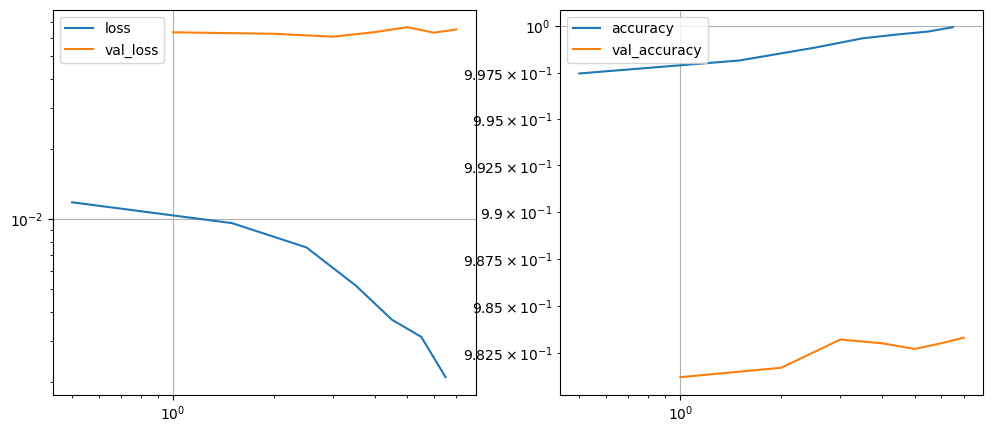

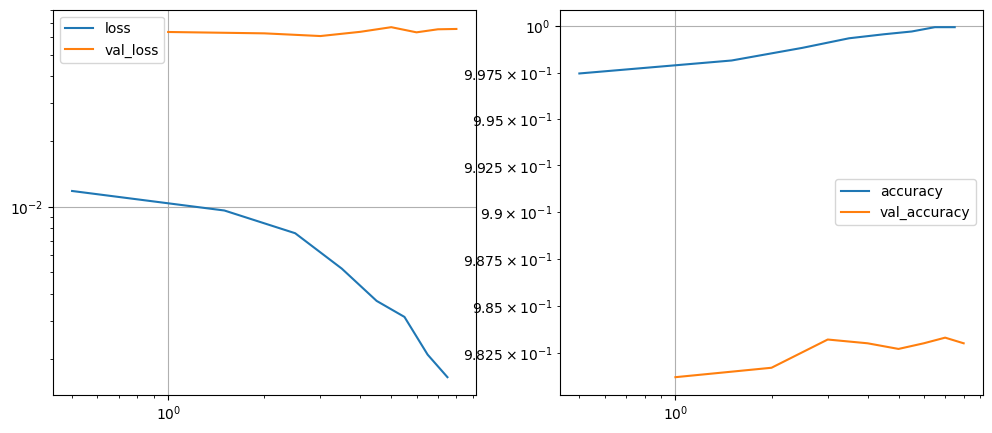

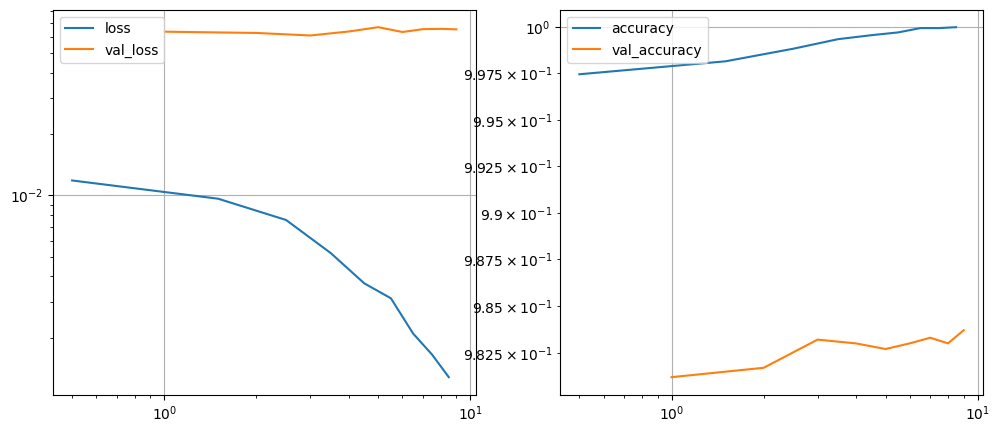

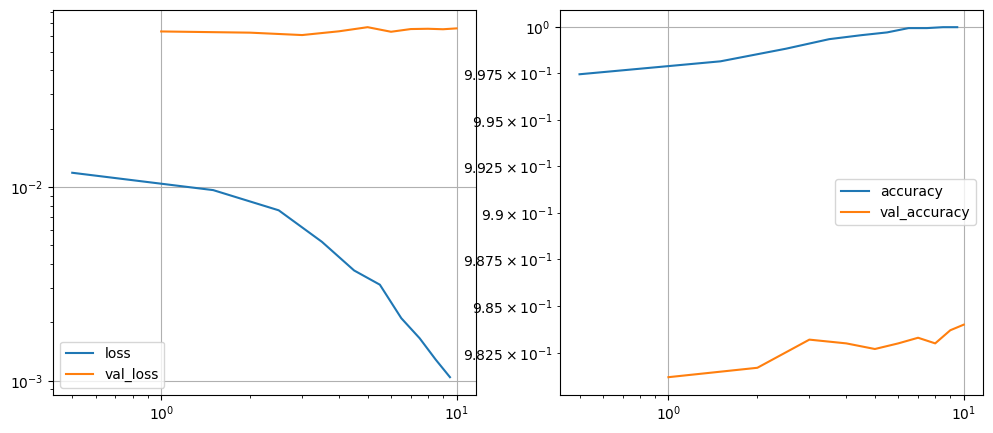

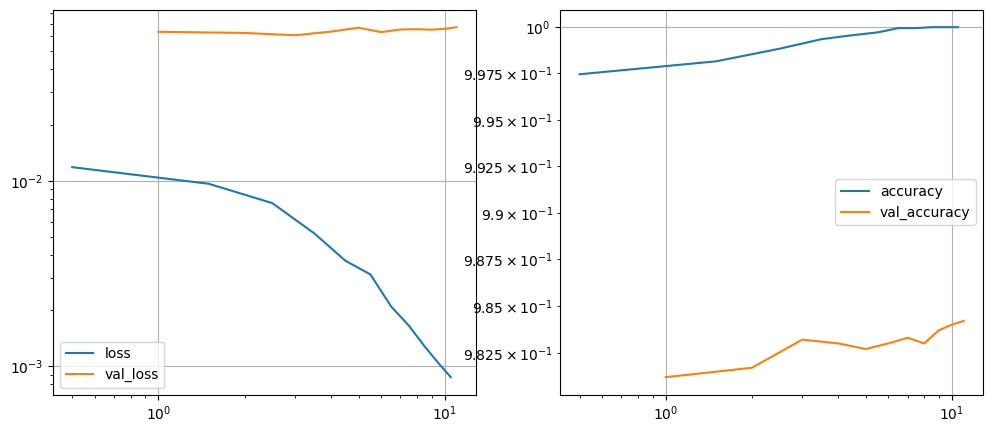

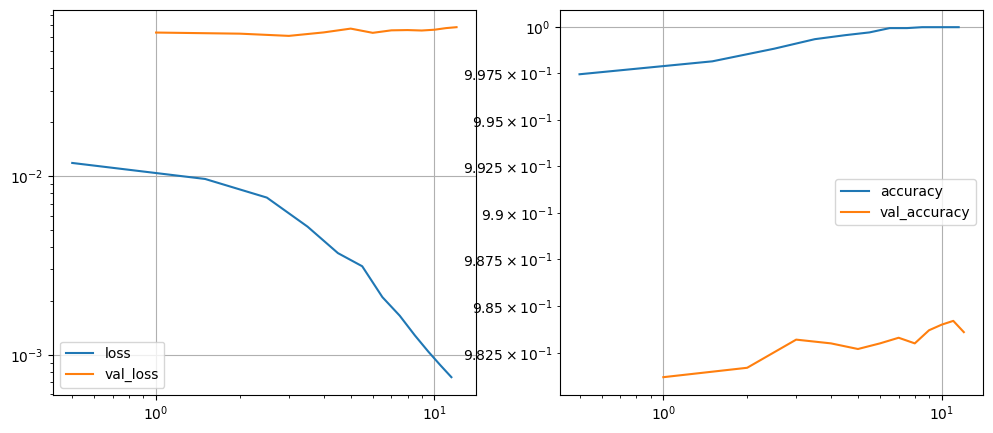

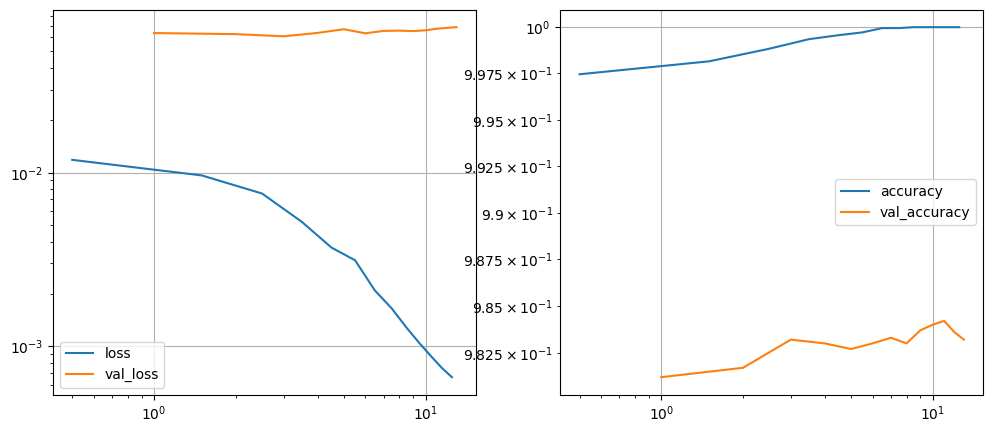

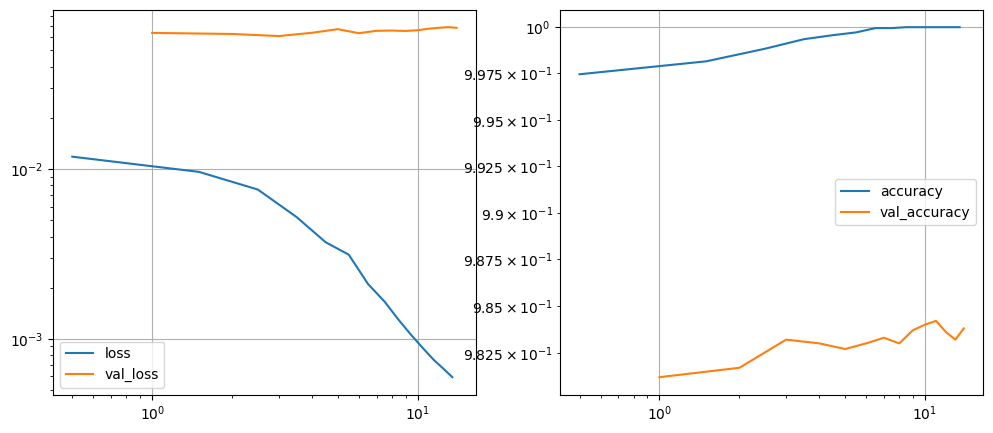

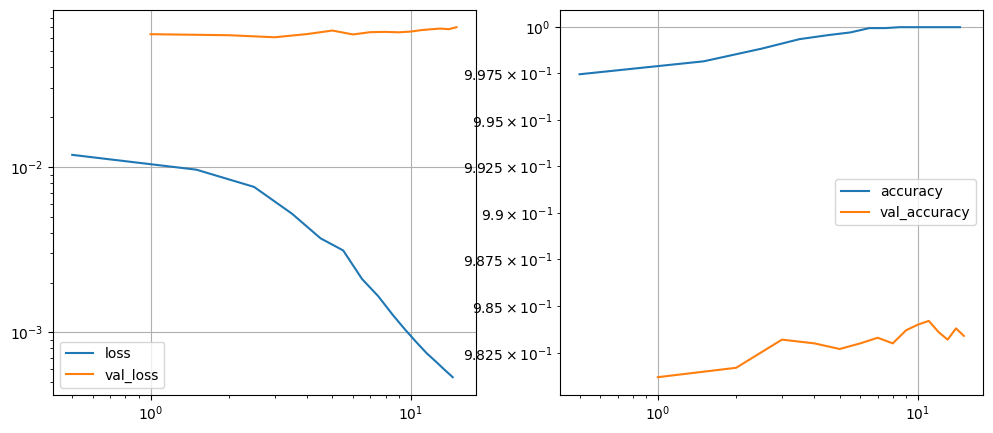

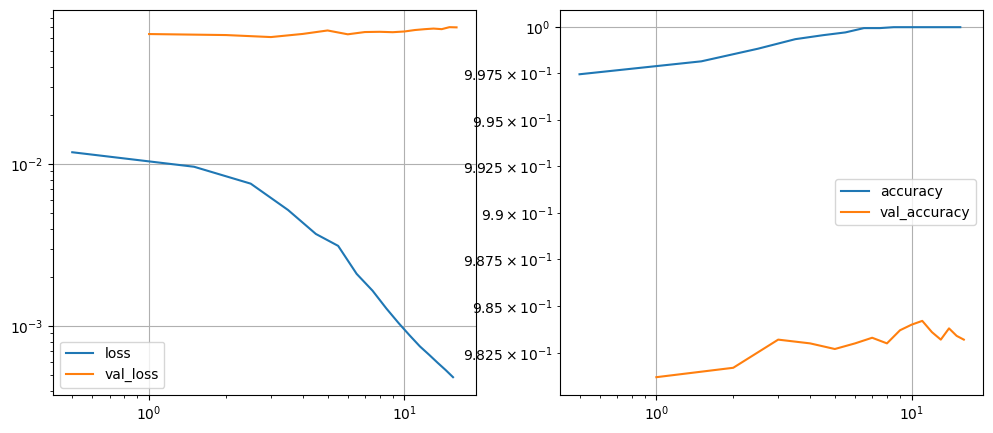

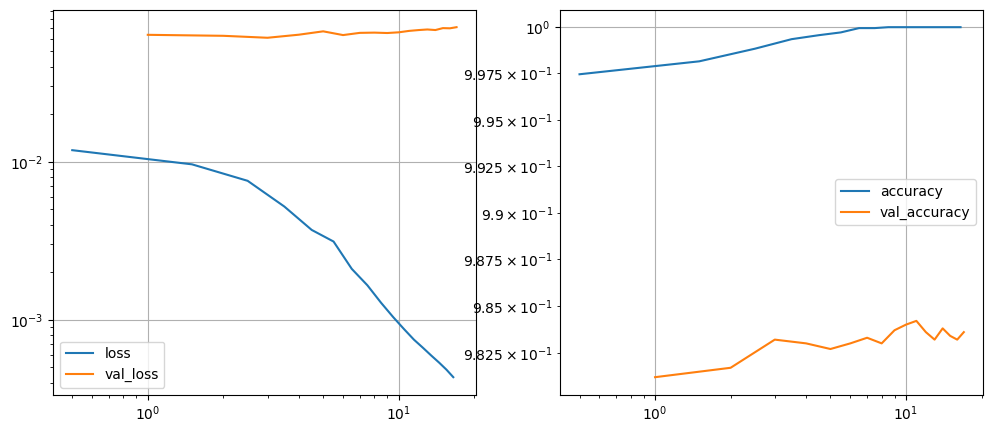

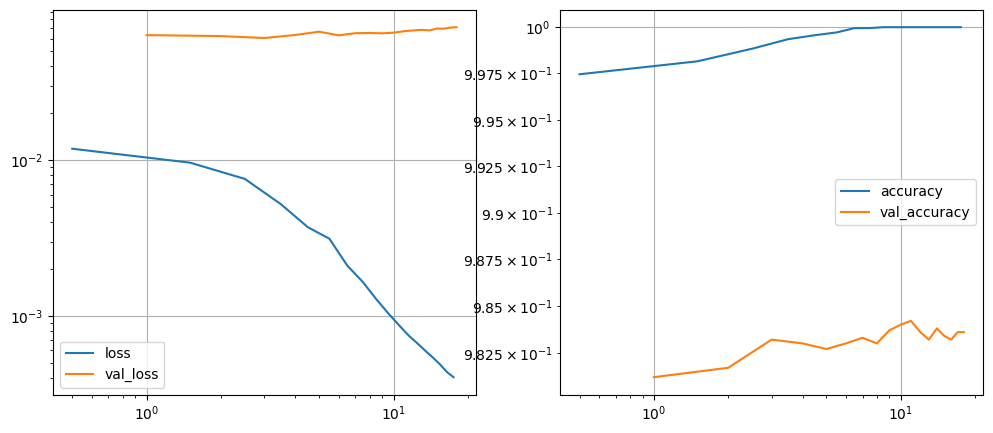

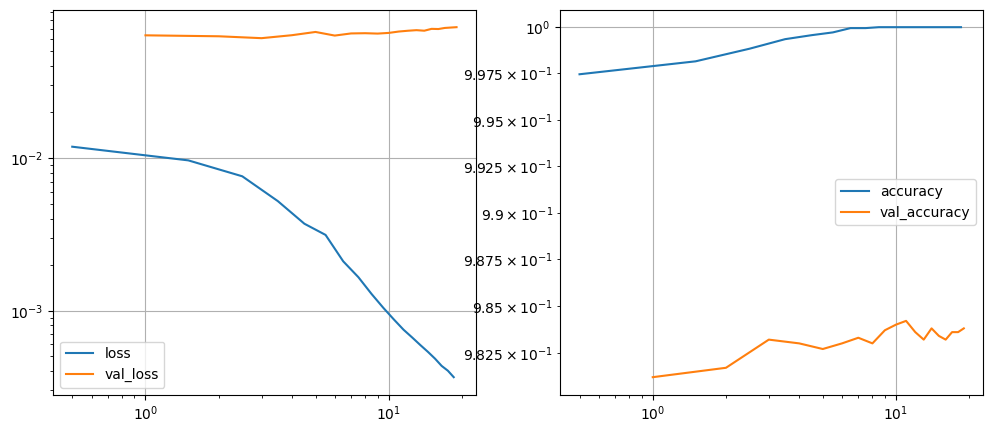

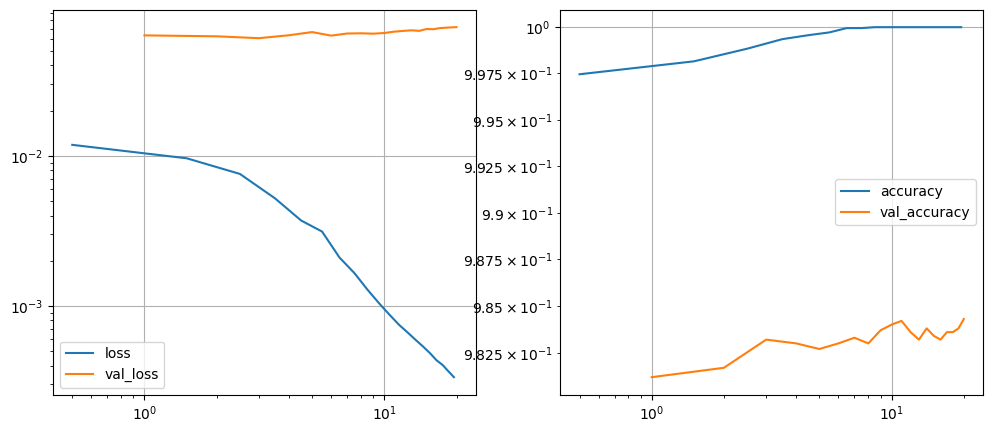

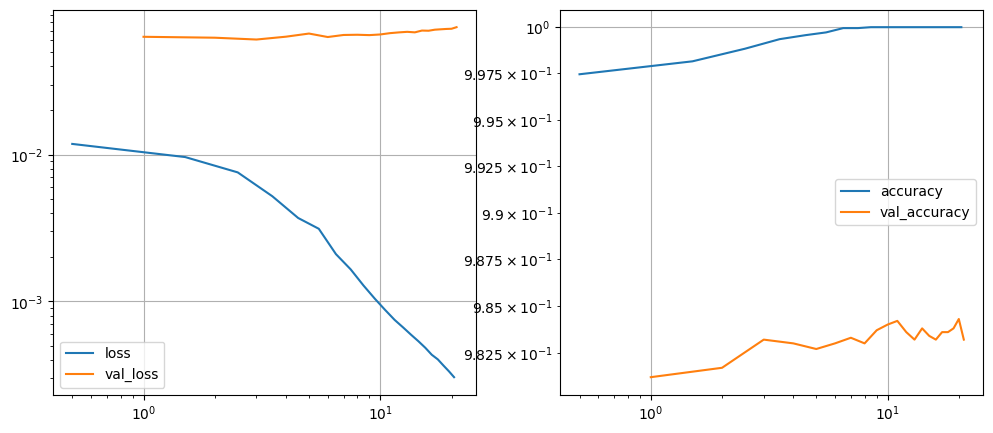

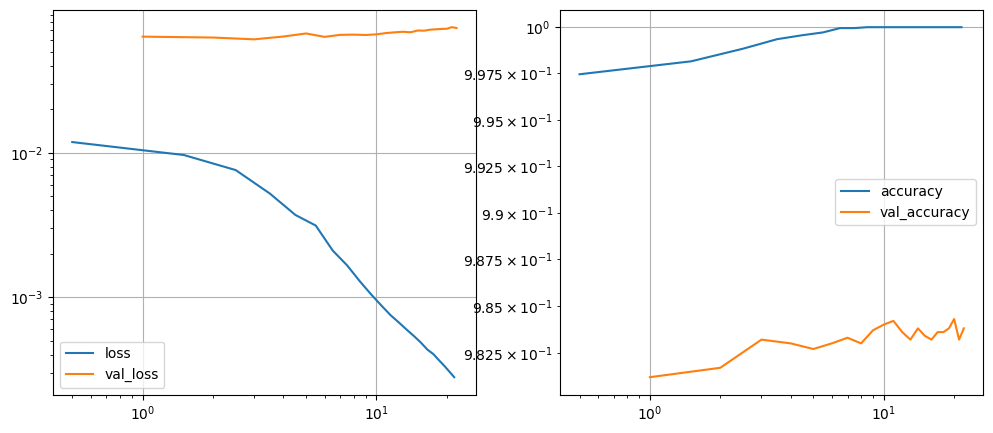

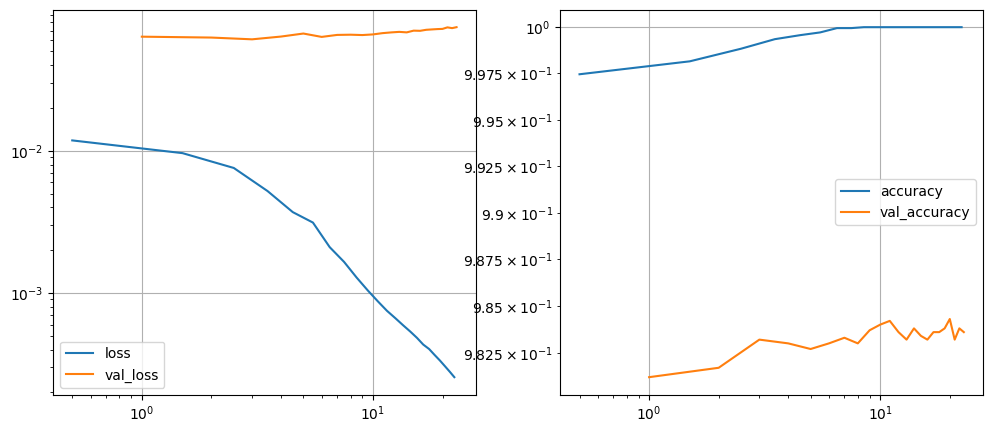

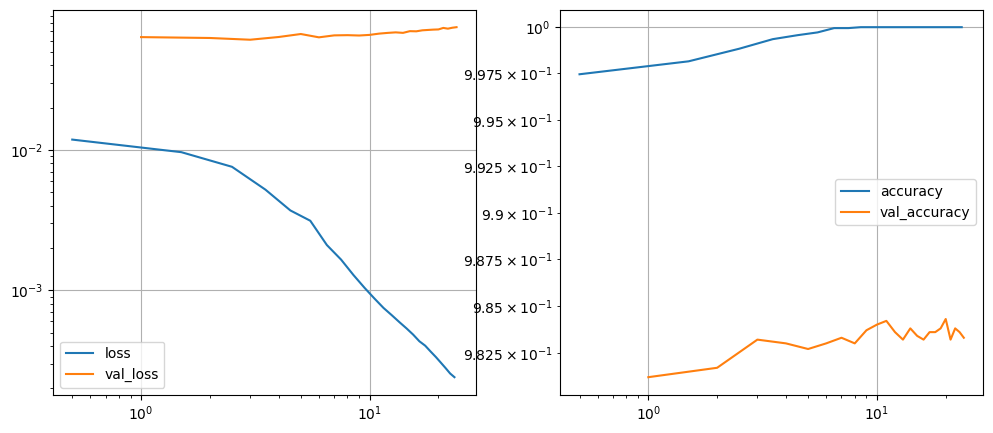

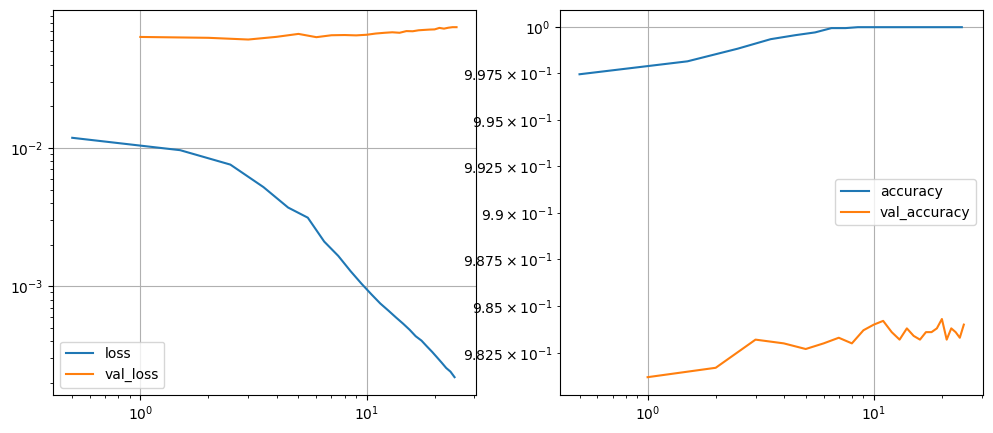

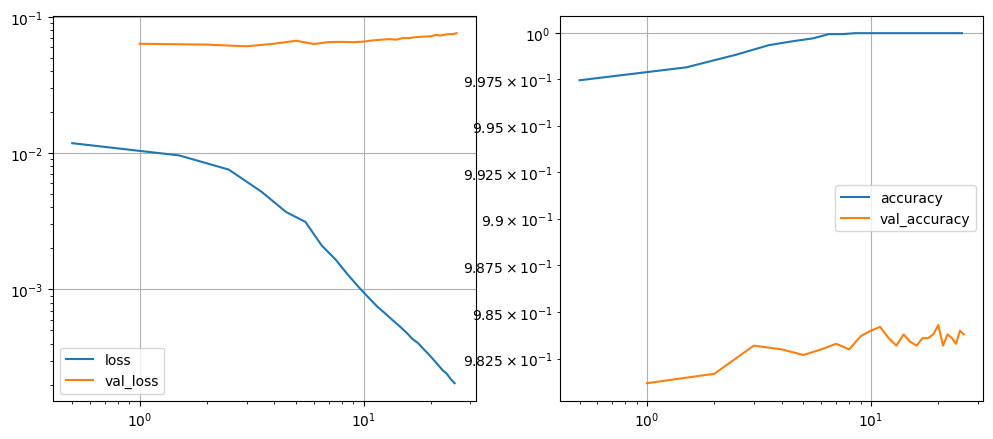

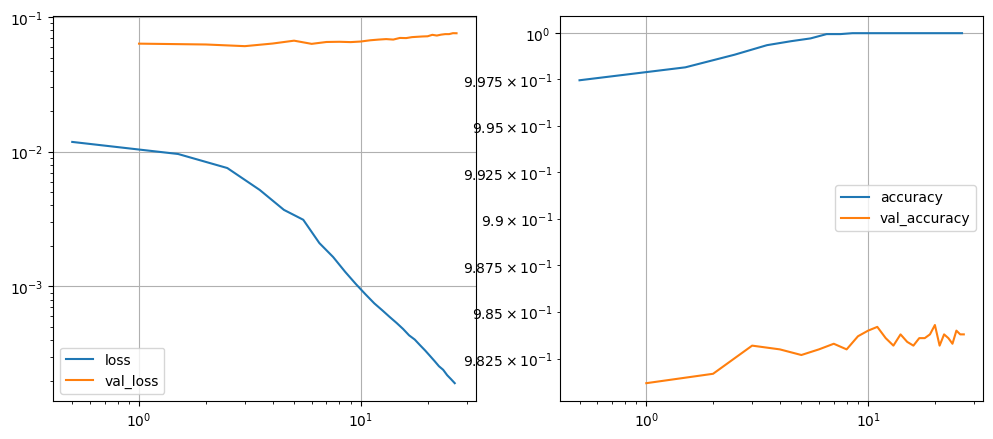

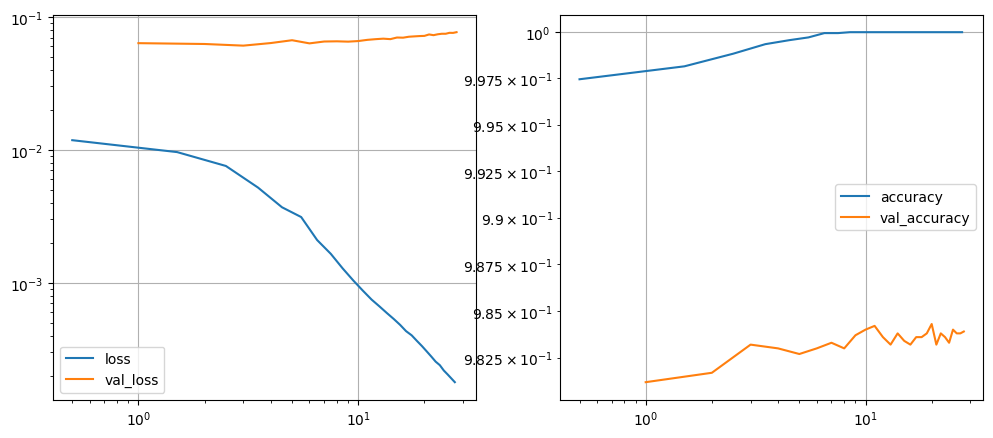

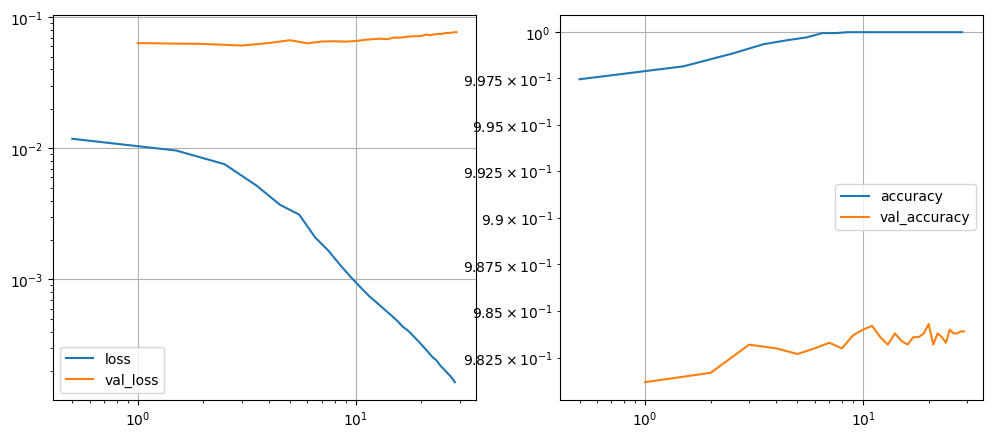

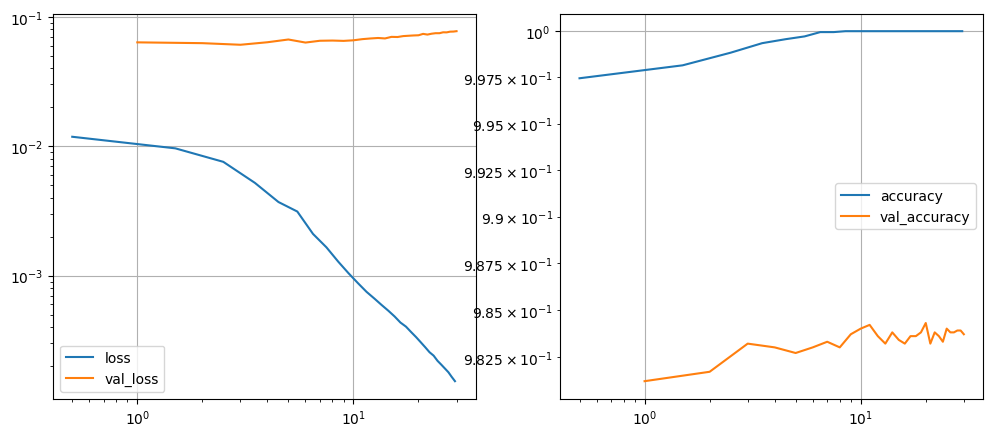

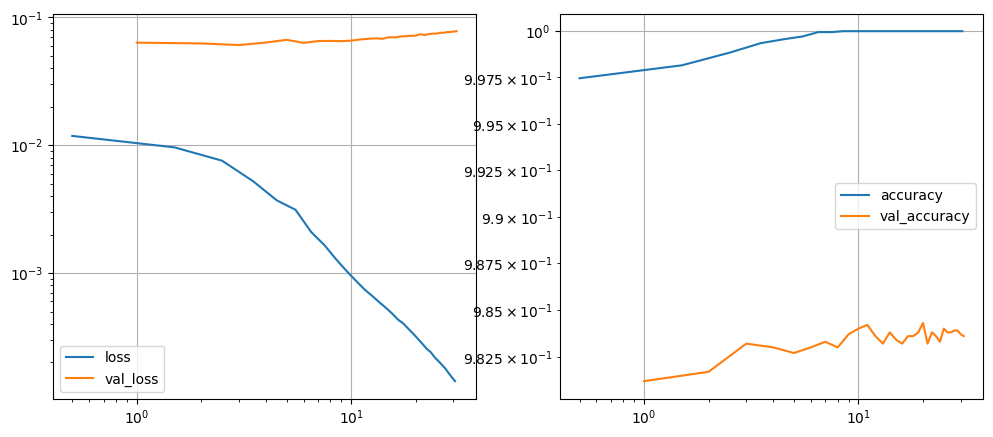

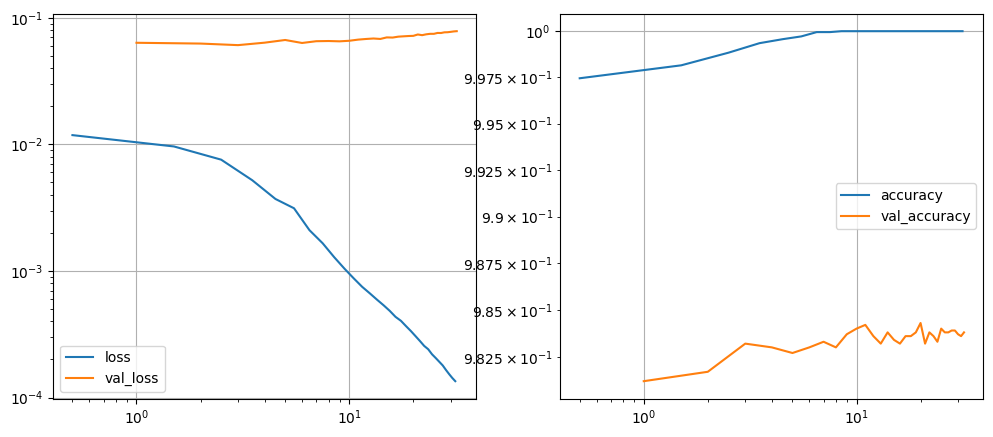

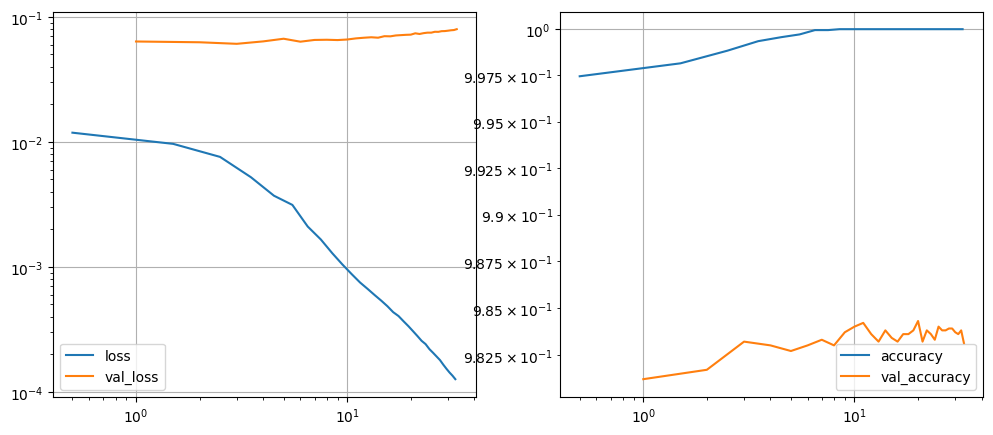

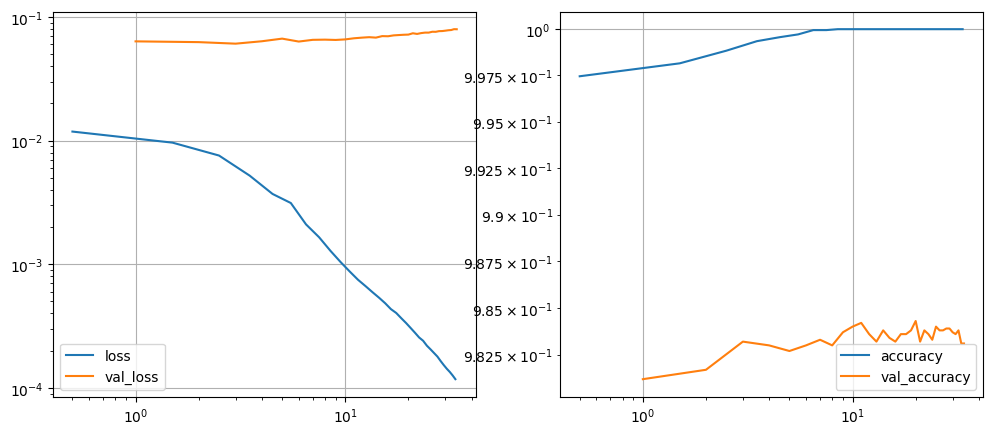

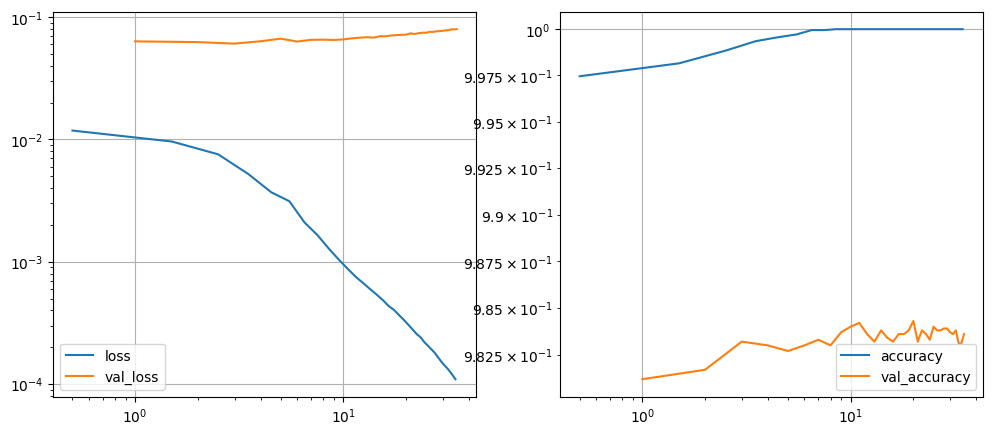

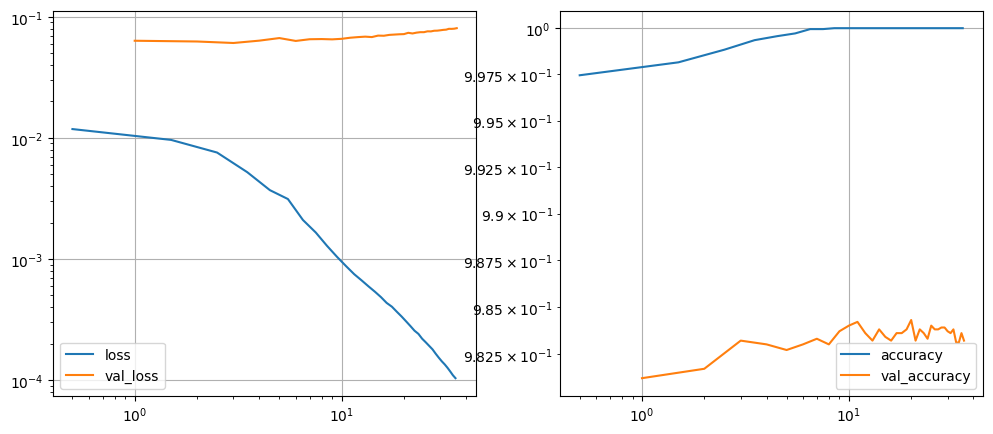

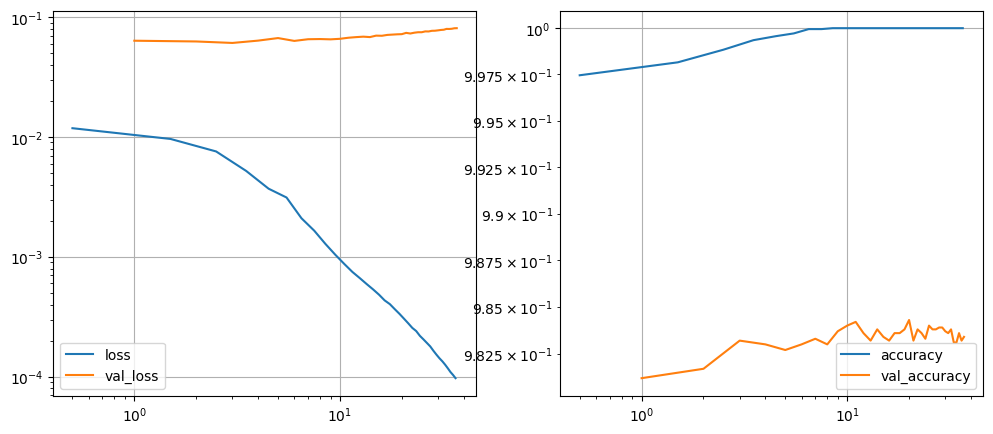

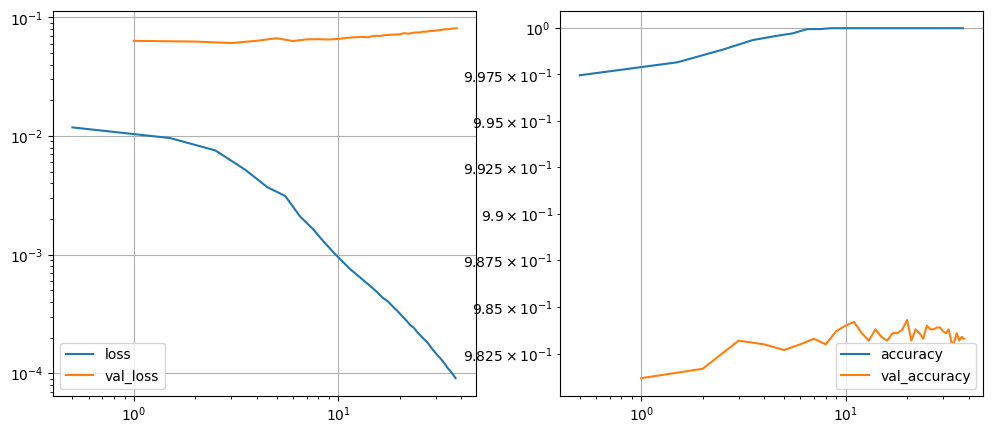

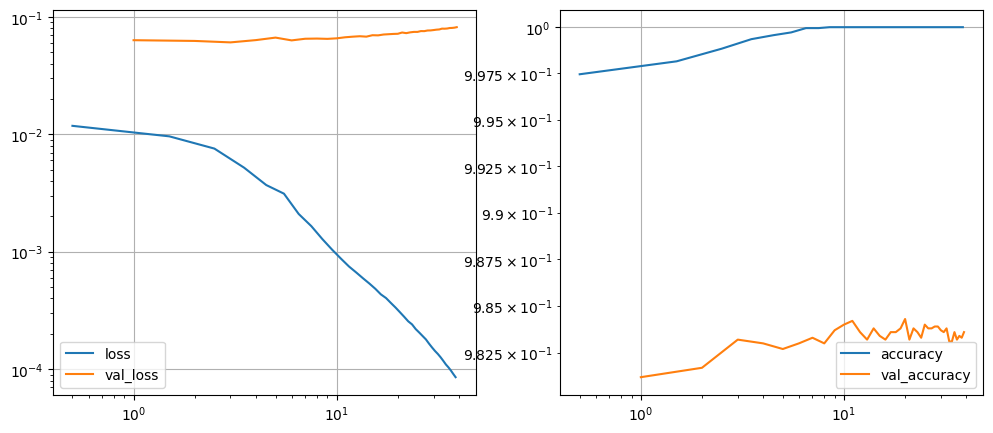

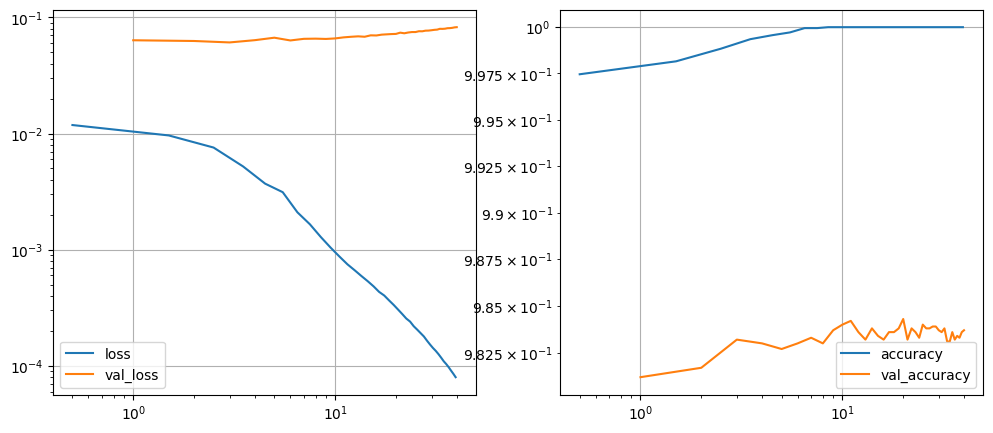

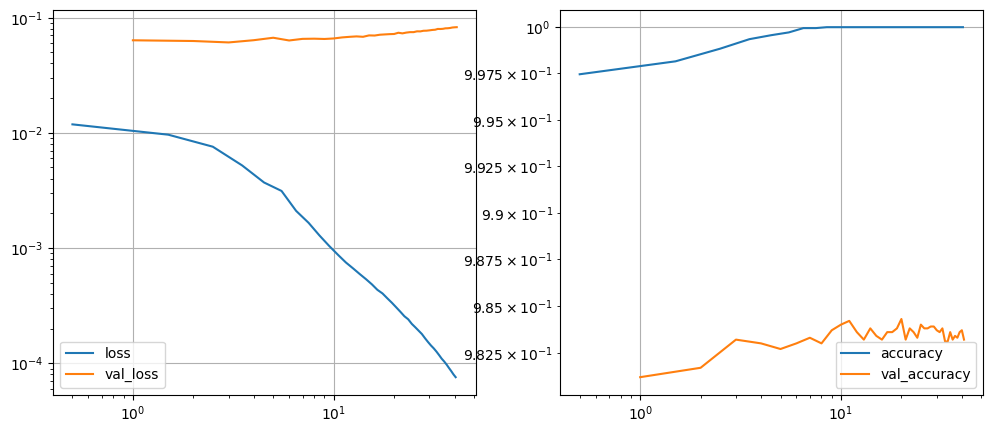

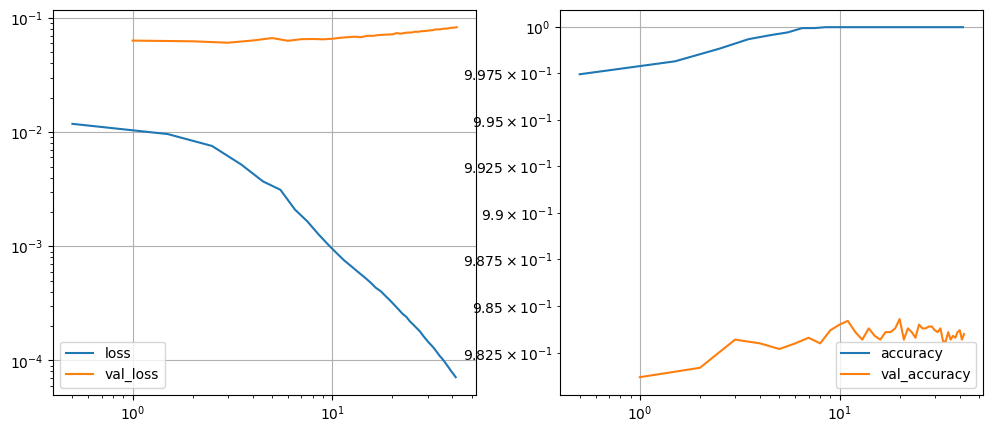

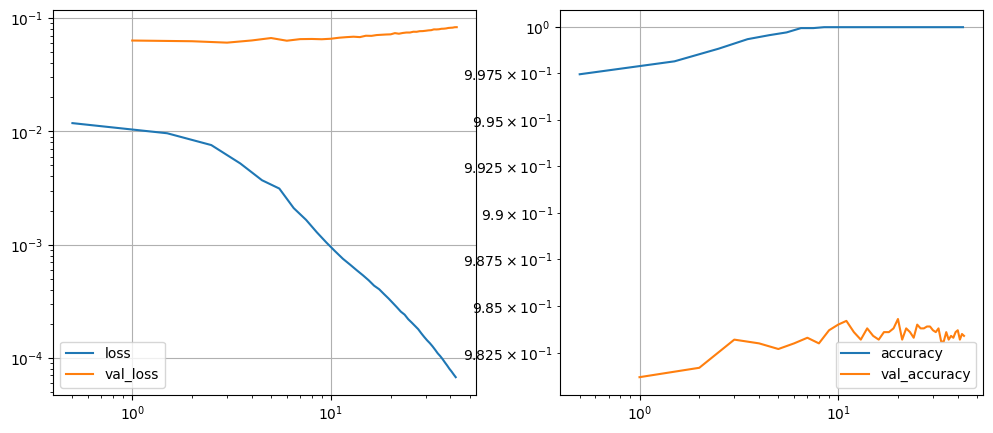

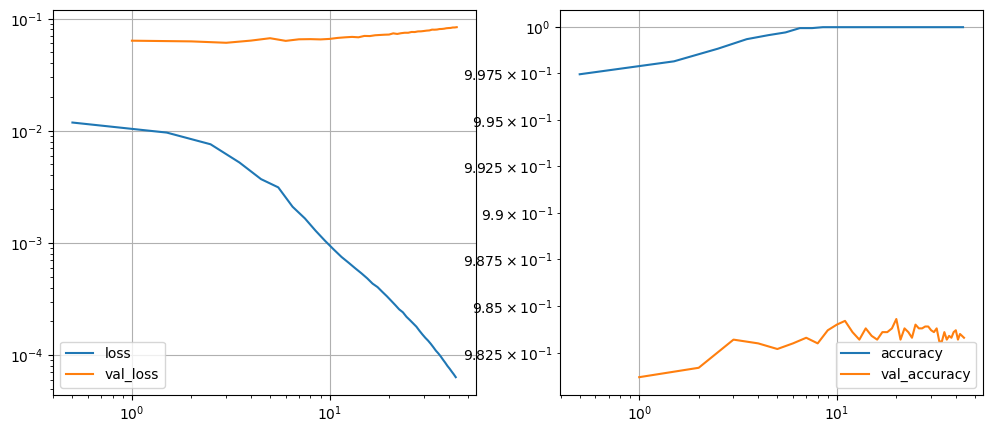

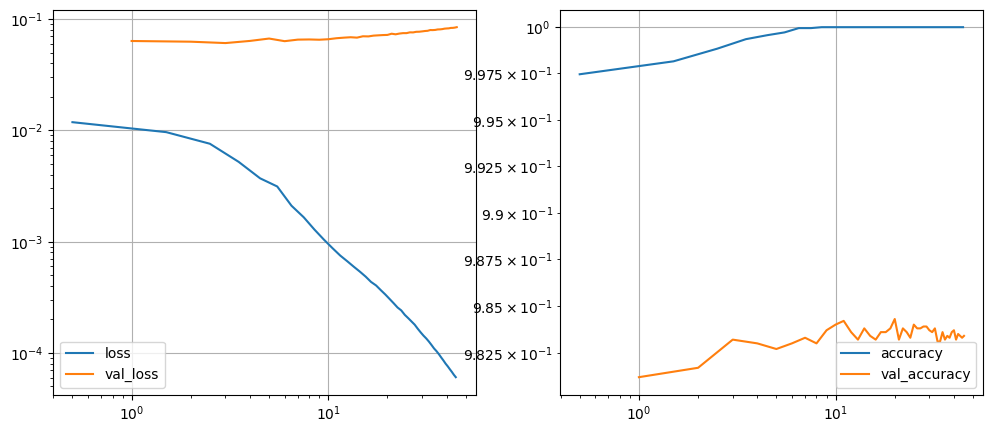

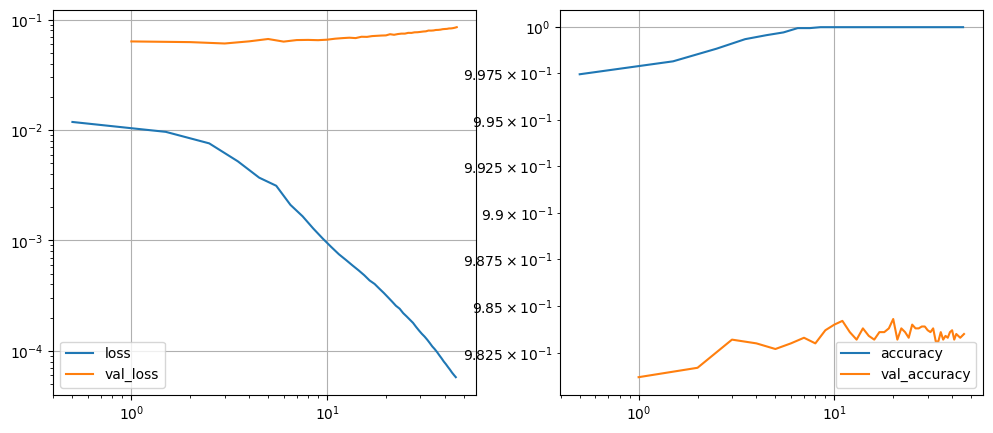

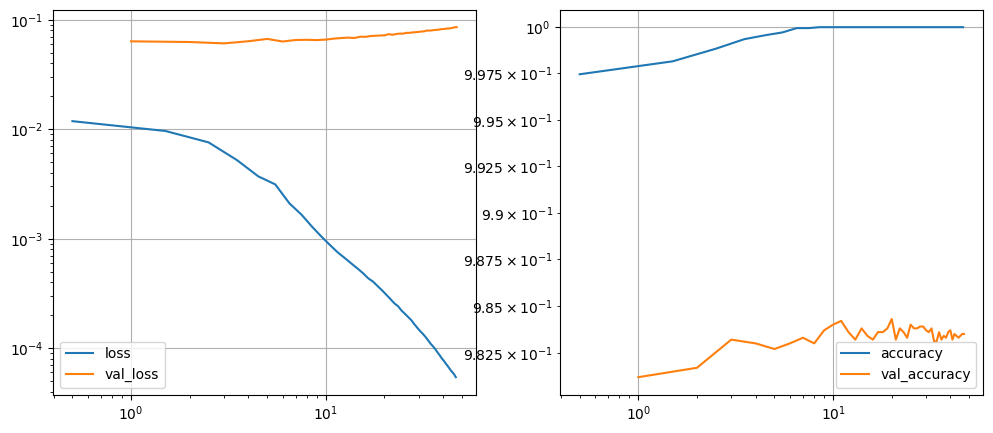

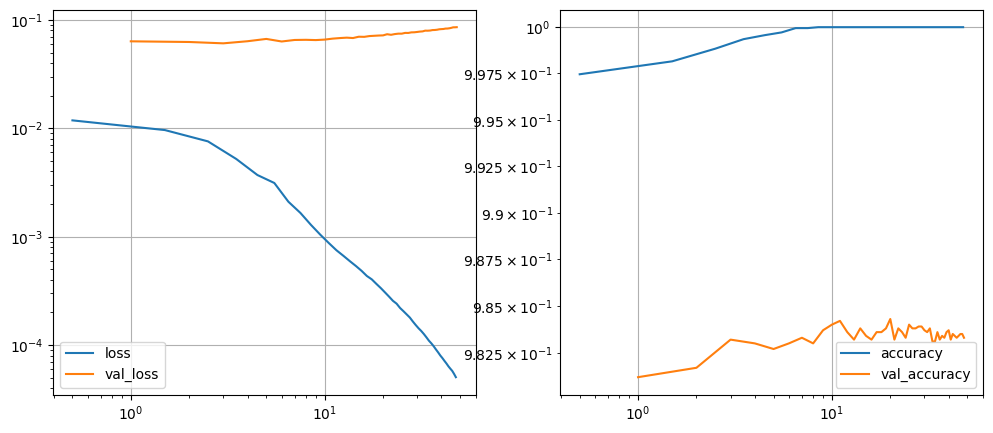

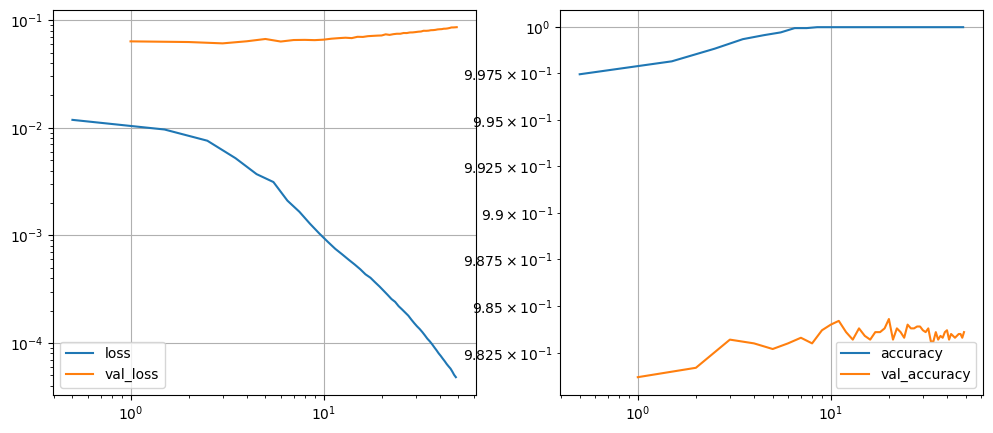

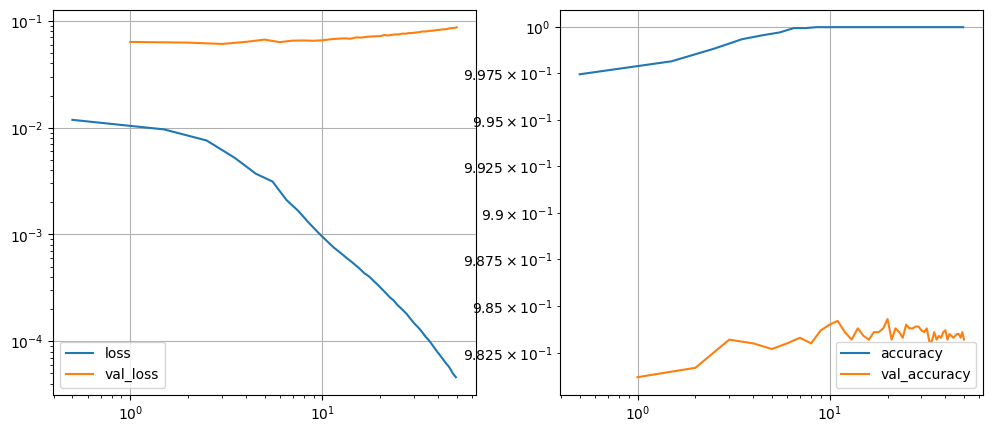

In [30]:
model.history = keras.callbacks.History()
for epoch in range(50):
    model.fit(X_train, y_train, epochs=1, batch_size=1024,
              validation_data=(X_test, y_test), callbacks=[model.history])
    visualize(model.history)

История loss и accuracy на обучающих данных усредняются по каждой эпохе. Это приводит к тому, что эти показатели оказываются хуже, чем если бы они были рассчитаны на всем обучающем датасете в конце эпохи. Поэтому при визуализации график loss и accuracy на обучающих данных полезно сдвигать влево, от конца к середине эпохи.

## TensorBoard